In [1]:
# Created on Sun Aug 13 13:14:06 2023

# @author: katelynsmith

import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
#plt.style.use(['no-latex']) 
#from emcee import MASER

import astropy.units as u
from astropy.timeseries import BoxLeastSquares

import maser as ms
import starspot as ss
import astrobase as ab
#from astrobase import periodbase

from tqdm import tqdm 
# Setting directory

ddir = '/Users/katelynsmith/Desktop/Capstone/'

import warnings
warnings.filterwarnings("ignore")

import latex

/Users/katelynsmith/opt/anaconda3/envs/example/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:

# Defining variables 

M_s = 0.5 # Star mass (solar masses) #### REFERENCE (PAPER 6 on one note) #####
R_s = 0.75 # Star radius (solar radii) ####  REFERENCE (PAPER 6 on one note) ####
P_s = 4.86 # Star rotation period (days) ####  REFERENCE (PAPER 6 on one note) ####
i_s = 90 # Star inclination of the rotation axis relative to the line of sight (degrees) ####  ACCORDING TO MEETING WITH BEN ####
B_s = 430 # Star dipole field strength at the magnetic poles (Gauss) #### https://arxiv.org/pdf/2304.09642.pdf #### 
beta = 20 # Star magnetic obliquity (degrees) #### ACCORDING TO MEETING WITH BEN ####
phi_s0 = 0.2 # Star rotation phase at times = 0 (0 – 1) <<<<<< LEFT AS IS
a = 10 # Planet orbital distance (stellar radii) #### REFERENCE (PAPER 6 on one note) ####
i_p = 89.18 # Planet inclination of the orbital axis relative to the line of sight (degrees) #### REFERENCE (PAPER 7 on one note) #### 
lam = 0 # Planet projected spin-orbit angle (degrees) #### ranging from -15 to 18 degrees 
#REFERENCE Spin-orbit alignment and magnetic activity in the young planetary system AU Mic⋆ ####
P_p = 8.4630351 # AU Mic b period in days
phi_p0 = 0.6 # Planet orbital phase at times = 0 (0 – 1) <<<<< LEFT AS IS
f = 10 # Emission observing frequency (MHz) #### - MAY INCREASE TO 3 GHz REFERENCE (PAPER 6 on one note) ####
alpha = 75 # Emission cone opening angle (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023
dalpha = 5 # Emission cone thickness (degrees) <<<<< LEFT THESE AS IS - BASED ON KAVANAGH 2023

In [114]:
times = np.linspace(0, 50, 1000) # Array of observation times to compute (days)

# Call the function
vis_N, vis_S = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)


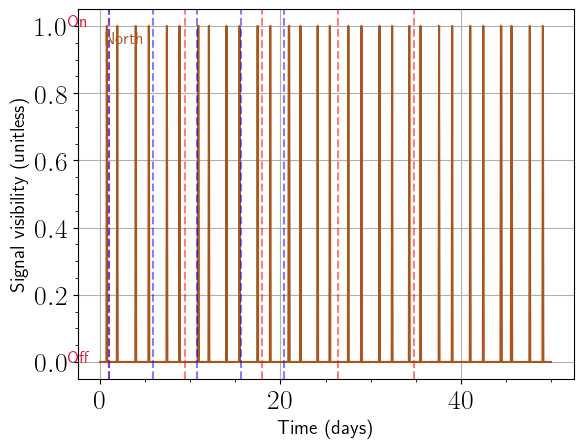

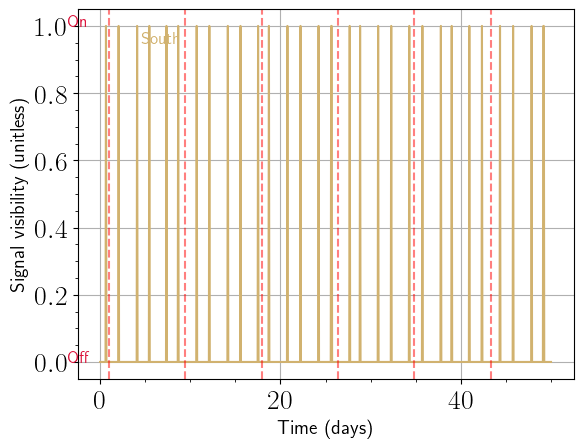

In [118]:
# Plotting results
plt.plot(times, vis_N, color = '#A9561E')
#plt.plot(times % P_s, vis_N, color = '#A9561E')  # attempting to fold light curve
# plt.plot(times % P_s, vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(0.5, 0.95, 'North', fontdict=None, fontsize=12, color = '#A9561E')
for j in range(5):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )
    plt.axvline(P_s * j+1,color='b',linestyle='--',alpha=0.5 )


plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()


plt.plot(times, vis_S, color = '#D1B26F')
matplotlib.pyplot.text(-3.7, 1, 'On', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(-3.7, 0, 'Off', fontdict=None, fontsize=12, color = '#DC143C')
matplotlib.pyplot.text(4.5, 0.95, 'South', fontdict=None, fontsize=12, color = '#D1B26F')
for j in range(6):
    plt.axvline(P_p * j+1,color='r',linestyle='--',alpha=0.5 )

plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Signal visibility (unitless)', fontsize=14)
plt.minorticks_on()
plt.grid()
# plt.xlim(0,5)
plt.show()

In [142]:
# finding index of when emissions are on and off

ups_N = np.where(vis_N > 0)
downs_N = np.where(vis_N < 1)

duration = []
for val in ups_N:
    dur = 
    

times_up = times[ups_N]
print(times_up)
times_down = times[downs_N]

#plt.plot(times_down, downs_N, '.', color='b')
#plt.plot(times_up, ups_N, '.', color='r')

#plt.show()

(array([ 15,  38,  79, 108, 148, 176, 217, 218, 241, 280, 309, 349, 377,
       418, 419, 444, 482, 509, 550, 579, 619, 647, 685, 710, 751, 780,
       820, 849, 888, 889, 911, 912, 952, 981]),)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ 0.75075075  1.9019019   3.95395395  5.40540541  7.40740741  8.80880881
 10.86086086 10.91091091 12.06206206 14.01401401 15.46546547 17.46746747
 18.86886887 20.92092092 20.97097097 22.22222222 24.12412412 25.47547548
 27.52752753 28.97897898 30.98098098 32.38238238 34.28428428 35.53553554
 37.58758759 39.03903904 41.04104104 42.49249249 44.44444444 44.49449449
 45.5955956  45.64564565 47.64764765 49.0990991 ]


In [ ]:
]


downs_N = np.where(np.diff(vis_N,1) < 0)[0] # find where it went down
print(times[downs_N])
lens = times[downs_N] - times[ups_N] # assuming these are always paired and you're not cut off at the end, each has a finite duration
print(f'Starts: {np.array2string(times[ups_N], precision=2, floatmode="fixed")}, Durations {np.array2string(lens, precision=2, floatmode="fixed")}') # print these
# print(np.array2string(x[ups], precision=2, floatmode='fixed'))
plt.plot(times[ups_N],vis_N[ups_N],'o') # plot these
plt.plot(times[downs_N],0*vis_N[downs_N],'o')

In [70]:
help(ss.RotationModel.acf_rotation)

Help on function acf_rotation in module starspot.starspot:

acf_rotation(self, interval, smooth=9, cutoff=0, window_length=99, polyorder=3)
    Calculate a rotation period based on an autocorrelation function.
    
    Args:
        interval (float): The time in days between observations. For
            Kepler/K2 long cadence this is 0.02043365, for Tess its about
            0.00138889 days. Use interval = "TESS" or "Kepler" for these.
        smooth (Optional[float]): The smoothing window in days.
        cutoff (Optional[float]): The number of days to cut off at the
            beginning.
        window_length (Optional[float]): The filter window length.
        polyorder (Optional[float]): The polynomial order of the filter.
    
    Returns:
        acf_period (float): The ACF rotation period in days.



In [91]:
# Converting true and false values from maser into 1 and 0 for use in starspot acf code

visibility_North = []
visibility_South = []
for ind, val in enumerate(vis_N):
    if val == True and vis_S[ind] == True:
        visn = 1
        viss = 1
        visibility_North.append(visn)
        visibility_South.append(viss)
    elif val == True and vis_S[ind] == False:
        visn = 1
        viss = 0
        visibility_North.append(visn)
        visibility_South.append(viss)
    elif val == False and vis_S[ind] == True:
        visn = 0
        viss = 1
        visibility_North.append(visn)
        visibility_South.append(viss)
    elif val == False and vis_S[ind] == False:
        visn = 0
        viss = 0
        visibility_North.append(visn)
        visibility_South.append(viss)



Best periods - N:47.80, S:3.95


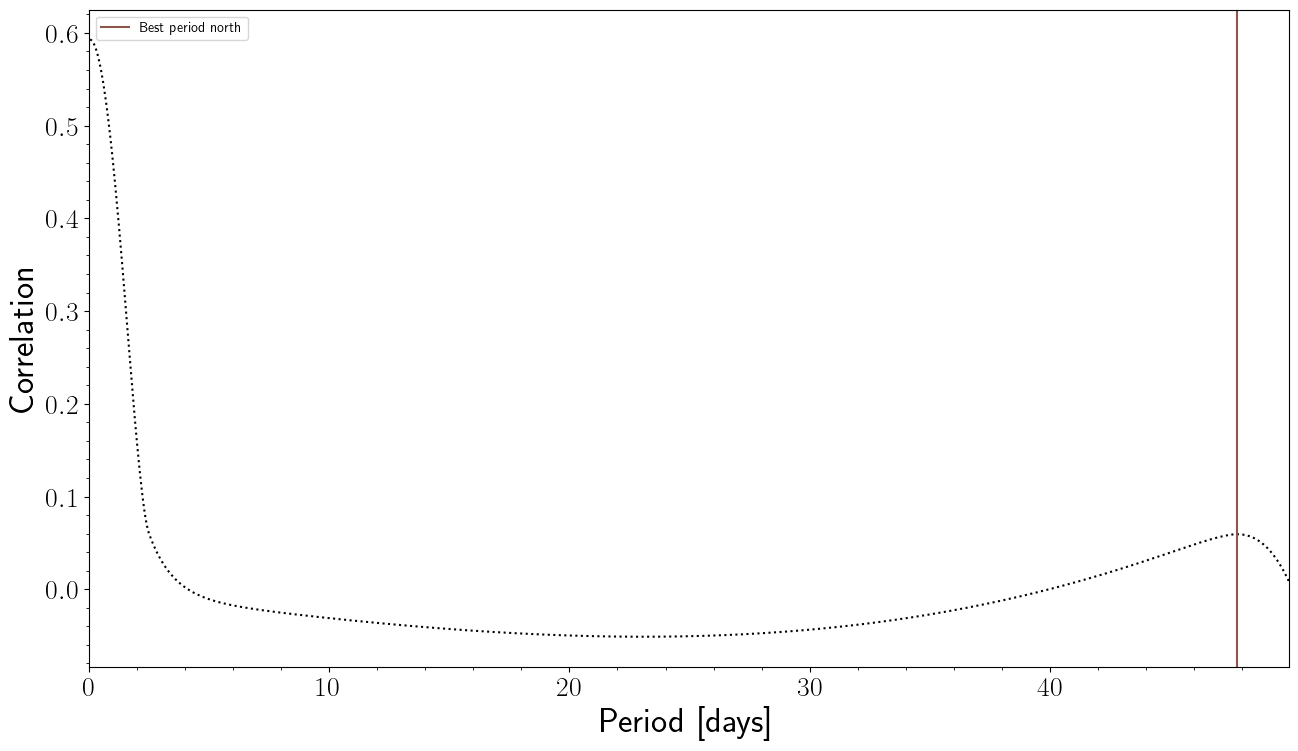

In [94]:
# Running the starspot code

times = np.linspace(0, 50, 1000)
visibility_North = np.exp(times)

rotate_N = ss.RotationModel(times, visibility_North, None)
#rotate_S = ss.RotationModel(times, visibility_South, None)
acf_period_N = rotate_N.acf_rotation(interval=np.diff(times)[0])
#acf_period_S = rotate_S.acf_rotation(interval=np.diff(times)[0])

print(f'Best periods - N:{acf_period_N:.2f}, S:{acf_period_S:.2f}')


fig = plt.figure(figsize=(16, 9))
plt.plot(rotate_N.lags, rotate_N.acf, ':', color='k')
#plt.plot(rotate_S.lags, rotate_S.acf, color='k')
plt.axvline(rotate_N.acf_period, color="C5", label='Best period north')
#plt.axvline(rotate_S.acf_period, color="C6", label='Best period south')
plt.xlabel("Period [days]")
plt.ylabel("Correlation")
plt.xlim(0, max(rotate_N.lags))
plt.legend()
plt.minorticks_on()
plt.subplots_adjust(left=.15, bottom=.15)
plt.show()

In [74]:
def period(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval):
   north_vis, south_vis = ms.maser(M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times)

   visibility_North = []
   visibility_South = []
   for ind, val in enumerate(north_vis):
      if val == True and south_vis[ind] == True:
         visn = 1
         viss = 1
         visibility_North.append(visn)
         visibility_South.append(viss)
      elif val == True and south_vis[ind] == False:
         visn = 1
         viss = 0
         visibility_North.append(visn)
         visibility_South.append(viss)
      elif val == False and south_vis[ind] == True:
         visn = 0
         viss = 1
         visibility_North.append(visn)
         visibility_South.append(viss)
      elif val == False and south_vis[ind] == False:
         visn = 0
         viss = 0
         visibility_North.append(visn)
         visibility_South.append(viss)

   rotate_N = ss.RotationModel(times, visibility_North, None)
   rotate_S = ss.RotationModel(times, visibility_South, None)

   north_acf = ss.simple_acf(times, north_vis, interval)
   south_acf = ss.simple_acf(times, south_vis, interval)

   acf_period_N = rotate_N.acf_rotation(interval=interval)
   acf_period_S = rotate_S.acf_rotation(interval=interval)

   return rotate_N, rotate_S, north_acf, south_acf, acf_period_N, acf_period_S

In [82]:
M_s, R_s, P_s, i_s, B_s, beta, phi_s0, a, i_p, lam, P_p, phi_p0, f, alpha, dalpha = 0.5, 0.75, 4.86, 90, 430, 20, 0.2, 10, 89.18, 0, 8.4630351, 0.6, 10, 75, 5 

times = np.linspace(0, 50, 1000)
interval = np.diff(times)[0]

betas = np.linspace(beta*0.5, beta*2, 50)
inclinations = np.linspace(i_s*0.5, i_s*2 ,5)

period_grid = np.zeros((len(betas), len(inclinations),2))
for j, b in (enumerate(tqdm(betas))):
    for k, inc in enumerate(inclinations):
        acf_period_N = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[4]
        acf_period_S = period(M_s, R_s, P_s, inc, B_s, b, phi_s0, a, i_p, lam, phi_p0, f, alpha, dalpha, times, interval)[5]
        period_grid[j, k, :] = acf_period_N, acf_period_S


  0%|          | 0/50 [00:01<?, ?it/s]


** On entry to DGELSD, parameter number  6 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares